# Decision Tree

We will create a decision tree build off of a dataset about cars. Each car can fall into four different classes which represent how satisfied someone would be with purchasing the car — unacc (unacceptable), acc (acceptable), good, vgood. Each car has 6 features:

    The price of the car which can be "vhigh", "high", "med", or "low".
    The cost of maintaining the car which can be "vhigh", "high", "med", or "low".
    The number of doors which can be "2", "3", "4", "5more".
    The number of people the car can hold which can be "2", "4", or "more".
    The size of the trunk which can be "small", "med", or "big".
    The safety rating of the car which can be "low", "med", or "high".

### Gini Impurity

To find the Gini impurity, start at 1 and subtract the squared percentage of each label in the set.

In [65]:
def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

### Information Gain

Information gain measures difference in the impurity of the data before and after the split. Below we will calculate weighted information gain:

In [66]:
def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * len(subset) / len(starting_labels)
  return info_gain

### split data

The split() function takes the data and labels that you want to split and the index of the feature you want to split on.

In [67]:
# split(cars, car_labels, 3) will split the data based on the third index (That feature was the number of people the car could hold).
def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets

### find best split

We create function find_best_split() that takes a set of data points and a set of labels. The function returns the index of the feature that causes the best split and the information gain caused by that split.

In [68]:
def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])):
        data_subsets, label_subsets = split(dataset, labels, feature)
        gain = information_gain(labels, label_subsets)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    return best_feature, best_gain

### Recursive Tree Building

Now that we can find the best feature to split the dataset, we can repeat this process again and again to create the full tree. This is a recursive algorithm. We start with every data point from the training set, find the best feature to split the data, split the data based on that feature, and then recursively repeat the process again on each subset that was created from the split. We’ll stop the recursion when we can no longer find a feature that results in any information gain. In other words, we want to create a leaf of the tree when we can’t find a way to split the data that makes purer subsets.

In [69]:
def build_tree(data, labels):
  best_feature, best_gain = find_best_split(data, labels)
  if best_gain == 0:
    return Counter(labels)
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
    branch = build_tree(data_subsets[i], label_subsets[i])
    branches.append(branch)
  return branches

### All Codes

We’ve slightly changed the way our build_tree() function works. Instead of returning a list of branches or a Counter object, the build_tree() function now returns a Leaf object or an Internal_Node object. 

In [70]:
from collections import Counter

def split(dataset, labels, column):
    data_subsets = []
    label_subsets = []
    counts = list(set([data[column] for data in dataset]))
    counts.sort()
    for k in counts:
        new_data_subset = []
        new_label_subset = []
        for i in range(len(dataset)):
            if dataset[i][column] == k:
                new_data_subset.append(dataset[i])
                new_label_subset.append(labels[i])
        data_subsets.append(new_data_subset)
        label_subsets.append(new_label_subset)
    return data_subsets, label_subsets

def gini(dataset):
  impurity = 1
  label_counts = Counter(dataset)
  for label in label_counts:
    prob_of_label = label_counts[label] / len(dataset)
    impurity -= prob_of_label ** 2
  return impurity

def information_gain(starting_labels, split_labels):
  info_gain = gini(starting_labels)
  for subset in split_labels:
    info_gain -= gini(subset) * len(subset)/len(starting_labels)
  return info_gain  

class Leaf:
    def __init__(self, labels, value):
        self.labels = Counter(labels)
        self.value = value

class Internal_Node:
    def __init__(self,
                 feature,
                 branches,
                 value):
        self.feature = feature
        self.branches = branches
        self.value = value

        
def find_best_split(dataset, labels):
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])):
        data_subsets, label_subsets = split(dataset, labels, feature)
        gain = information_gain(labels, label_subsets)
        if gain > best_gain:
            best_gain, best_feature = gain, feature
    return best_feature, best_gain

def build_tree(data, labels, value = ""):
  best_feature, best_gain = find_best_split(data, labels)
  if best_gain == 0:
    return Leaf(Counter(labels), value)
  data_subsets, label_subsets = split(data, labels, best_feature)
  branches = []
  for i in range(len(data_subsets)):
    branch = build_tree(data_subsets[i], label_subsets[i], data_subsets[i][0][best_feature])
    branches.append(branch)
  return Internal_Node(best_feature, branches, value)
        
        
cars = [['high', 'low', '5more', '4', 'big', 'high'], ['high', 'vhigh', '4', 'more', 'med', 'med'], ['high', 'med', '4', '2', 'med', 'high'], ['low', 'vhigh', '4', '2', 'med', 'med'], ['vhigh', 'low', '5more', '2', 'small', 'low'], ['vhigh', 'high', '5more', '4', 'small', 'low'], ['med', 'med', '2', 'more', 'small', 'med'], ['med', 'med', '2', 'more', 'small', 'high'], ['med', 'low', '2', '4', 'med', 'high'], ['high', 'vhigh', '4', '4', 'small', 'low'], ['vhigh', 'low', '5more', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'big', 'med'], ['high', 'med', '4', '4', 'small', 'high'], ['med', 'med', '5more', 'more', 'med', 'high'], ['low', 'vhigh', '4', 'more', 'small', 'med'], ['high', 'med', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '5more', '2', 'med', 'med'], ['low', 'vhigh', '2', '2', 'big', 'high'], ['med', 'high', '2', '4', 'med', 'low'], ['vhigh', 'med', '2', '4', 'med', 'low'], ['low', 'high', '3', '4', 'med', 'high'], ['med', 'low', '5more', '4', 'med', 'high'], ['high', 'high', '3', '2', 'big', 'low'], ['low', 'vhigh', '2', '4', 'big', 'low'], ['high', 'low', '4', '2', 'small', 'high'], ['vhigh', 'med', '5more', 'more', 'big', 'high'], ['vhigh', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'med', '5more', '2', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'high'], ['low', 'high', '2', 'more', 'small', 'low'], ['med', 'vhigh', '2', 'more', 'med', 'high'], ['low', 'vhigh', '5more', '2', 'small', 'high'], ['med', 'med', '4', '2', 'med', 'low'], ['med', 'low', '4', '4', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'big', 'high'], ['high', 'high', '4', 'more', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'low'], ['high', 'high', '3', '4', 'med', 'med'], ['high', 'low', '5more', '4', 'small', 'low'], ['low', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'high', '3', '4', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'low'], ['med', 'high', '2', '2', 'med', 'low'], ['low', 'vhigh', '3', 'more', 'med', 'high'], ['vhigh', 'low', '3', '4', 'big', 'low'], ['high', 'high', '2', 'more', 'big', 'med'], ['low', 'vhigh', '3', '2', 'med', 'low'], ['low', 'med', '5more', 'more', 'med', 'med'], ['high', 'med', '3', 'more', 'small', 'high'], ['high', 'med', '5more', 'more', 'big', 'high'], ['med', 'vhigh', '2', '2', 'med', 'high'], ['low', 'high', '3', '2', 'big', 'high'], ['vhigh', 'high', '3', 'more', 'big', 'low'], ['vhigh', 'med', '2', '2', 'big', 'low'], ['high', 'vhigh', '4', '4', 'big', 'med'], ['low', 'med', '4', 'more', 'med', 'low'], ['high', 'high', '3', '4', 'small', 'med'], ['med', 'low', '3', '4', 'small', 'high'], ['vhigh', 'vhigh', '5more', '2', 'big', 'low'], ['vhigh', 'med', '3', 'more', 'med', 'high'], ['high', 'low', '2', '4', 'med', 'high'], ['low', 'high', '4', '2', 'small', 'med'], ['high', 'med', '2', '4', 'med', 'high'], ['low', 'med', '3', '4', 'big', 'high'], ['high', 'low', '4', 'more', 'big', 'low'], ['high', 'low', '5more', '2', 'med', 'low'], ['low', 'high', '2', 'more', 'small', 'high'], ['med', 'high', '2', '2', 'big', 'high'], ['med', 'high', '3', '4', 'small', 'high'], ['high', 'high', '3', '4', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'med', '4', '4', 'small', 'high'], ['high', 'low', '4', 'more', 'big', 'med'], ['high', 'med', '2', 'more', 'big', 'low'], ['low', 'vhigh', '3', '2', 'med', 'high'], ['vhigh', 'vhigh', '5more', '2', 'big', 'high'], ['low', 'high', '4', '4', 'med', 'high'], ['high', 'low', '4', 'more', 'big', 'high'], ['med', 'vhigh', '5more', '2', 'small', 'low'], ['high', 'med', '4', '4', 'med', 'low'], ['med', 'med', '3', '2', 'small', 'med'], ['vhigh', 'low', '3', 'more', 'med', 'high'], ['high', 'low', '2', '2', 'small', 'med'], ['med', 'med', '5more', 'more', 'big', 'high'], ['high', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'med', '5more', 'more', 'small', 'high'], ['high', 'low', '4', '2', 'med', 'high'], ['low', 'high', '4', '2', 'big', 'high'], ['low', 'vhigh', '2', '4', 'med', 'med'], ['low', 'med', '5more', '2', 'big', 'high'], ['vhigh', 'vhigh', '5more', '4', 'big', 'low'], ['vhigh', 'med', '4', '2', 'small', 'high'], ['med', 'high', '4', '2', 'med', 'med'], ['high', 'vhigh', '3', '4', 'small', 'low'], ['low', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'high', '3', '2', 'big', 'med'], ['high', 'high', '3', '4', 'big', 'med'], ['low', 'high', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'small', 'med'], ['med', 'med', '3', '2', 'big', 'high'], ['low', 'high', '4', '2', 'small', 'high'], ['vhigh', 'med', '2', '4', 'med', 'high'], ['high', 'med', '2', '2', 'small', 'med'], ['vhigh', 'low', '4', '2', 'big', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'high'], ['low', 'high', '2', '2', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'big', 'med'], ['med', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'med', '2', '2', 'small', 'low'], ['med', 'med', '2', '2', 'med', 'med'], ['low', 'med', '3', 'more', 'med', 'low'], ['med', 'high', '4', '4', 'big', 'high'], ['vhigh', 'vhigh', '2', '2', 'big', 'med'], ['high', 'med', '5more', '2', 'small', 'high'], ['low', 'high', '5more', '2', 'small', 'high'], ['low', 'med', '2', 'more', 'small', 'low'], ['low', 'high', '5more', '2', 'med', 'med'], ['high', 'med', '5more', '4', 'big', 'low'], ['vhigh', 'low', '3', 'more', 'big', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'low'], ['vhigh', 'med', '5more', '2', 'small', 'high'], ['low', 'vhigh', '2', '4', 'med', 'high'], ['med', 'low', '2', 'more', 'med', 'low'], ['high', 'low', '3', '2', 'med', 'high'], ['low', 'med', '4', 'more', 'big', 'low'], ['low', 'vhigh', '2', '4', 'big', 'high'], ['low', 'med', '3', '4', 'small', 'low'], ['low', 'med', '4', 'more', 'small', 'high'], ['med', 'low', '3', 'more', 'med', 'med'], ['high', 'med', '2', 'more', 'small', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'high', '5more', '2', 'big', 'high'], ['low', 'high', '3', '4', 'big', 'med'], ['high', 'high', '2', '2', 'med', 'low'], ['high', 'vhigh', '5more', '2', 'med', 'low'], ['vhigh', 'high', '5more', 'more', 'small', 'high'], ['high', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'low', '2', '4', 'med', 'high'], ['vhigh', 'vhigh', '3', 'more', 'small', 'high'], ['high', 'low', '2', 'more', 'med', 'low'], ['high', 'high', '3', 'more', 'small', 'med'], ['low', 'vhigh', '2', '2', 'big', 'low'], ['low', 'vhigh', '5more', '4', 'med', 'low'], ['med', 'vhigh', '4', '4', 'med', 'high'], ['vhigh', 'low', '2', 'more', 'small', 'med'], ['low', 'low', '5more', '4', 'small', 'low'], ['high', 'vhigh', '4', '4', 'med', 'med'], ['low', 'vhigh', '2', 'more', 'small', 'med'], ['high', 'high', '4', '4', 'small', 'med'], ['low', 'low', '4', '4', 'small', 'low'], ['high', 'high', '3', 'more', 'med', 'med'], ['high', 'med', '3', 'more', 'small', 'low'], ['med', 'vhigh', '3', '4', 'small', 'med'], ['high', 'high', '4', '2', 'med', 'med'], ['med', 'med', '3', '2', 'med', 'med'], ['vhigh', 'med', '5more', '2', 'big', 'high'], ['low', 'high', '3', '4', 'med', 'low'], ['low', 'low', '4', '4', 'big', 'med'], ['low', 'high', '2', 'more', 'med', 'high'], ['high', 'low', '4', '4', 'med', 'med'], ['low', 'vhigh', '2', '2', 'big', 'med'], ['high', 'vhigh', '4', '2', 'big', 'low'], ['vhigh', 'high', '4', '4', 'med', 'med'], ['vhigh', 'high', '2', 'more', 'small', 'high'], ['vhigh', 'vhigh', '2', 'more', 'med', 'med'], ['vhigh', 'high', '4', 'more', 'small', 'med'], ['high', 'high', '3', '2', 'med', 'high'], ['high', 'high', '4', 'more', 'big', 'low'], ['low', 'med', '4', '2', 'small', 'med'], ['med', 'vhigh', '3', 'more', 'big', 'low'], ['low', 'vhigh', '2', 'more', 'big', 'high'], ['high', 'high', '4', '2', 'med', 'high'], ['low', 'med', '4', '2', 'med', 'med'], ['vhigh', 'low', '5more', '4', 'big', 'low'], ['high', 'vhigh', '4', '4', 'small', 'high'], ['med', 'med', '2', '2', 'big', 'high'], ['high', 'med', '3', 'more', 'med', 'low'], ['low', 'med', '3', '2', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'low'], ['med', 'vhigh', '3', '4', 'big', 'med'], ['low', 'low', '2', '2', 'med', 'low'], ['med', 'high', '4', '2', 'small', 'med'], ['high', 'high', '4', '4', 'med', 'high'], ['med', 'low', '5more', 'more', 'big', 'low'], ['vhigh', 'med', '2', '4', 'small', 'low'], ['vhigh', 'low', '3', '4', 'big', 'med'], ['vhigh', 'vhigh', '5more', '4', 'big', 'high'], ['med', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'high', '2', 'more', 'small', 'med'], ['med', 'med', '4', 'more', 'small', 'med'], ['high', 'low', '2', '4', 'big', 'med'], ['high', 'low', '2', 'more', 'big', 'high'], ['high', 'high', '2', '4', 'small', 'high'], ['high', 'high', '4', '2', 'big', 'med'], ['low', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'med', '4', '2', 'small', 'low'], ['low', 'med', '4', '4', 'med', 'high'], ['vhigh', 'high', '5more', '4', 'med', 'low'], ['high', 'med', '5more', '4', 'med', 'high'], ['vhigh', 'med', '3', 'more', 'med', 'med'], ['med', 'low', '3', '4', 'med', 'low'], ['vhigh', 'med', '3', '2', 'big', 'med'], ['vhigh', 'low', '2', '4', 'small', 'high'], ['high', 'high', '3', 'more', 'big', 'med'], ['high', 'med', '3', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'high'], ['med', 'med', '3', '2', 'small', 'high'], ['vhigh', 'low', '4', '4', 'small', 'low'], ['med', 'high', '2', '4', 'small', 'low'], ['high', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'med'], ['med', 'low', '3', '4', 'big', 'med'], ['med', 'high', '2', '2', 'med', 'high'], ['low', 'vhigh', '3', 'more', 'big', 'med'], ['vhigh', 'high', '2', '4', 'small', 'med'], ['med', 'low', '3', '2', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'med'], ['high', 'vhigh', '3', '2', 'med', 'low'], ['vhigh', 'low', '2', '2', 'big', 'med'], ['high', 'vhigh', '3', 'more', 'small', 'high'], ['vhigh', 'low', '3', '4', 'med', 'med'], ['high', 'vhigh', '4', '4', 'small', 'med'], ['high', 'low', '5more', '4', 'med', 'high'], ['high', 'low', '4', '2', 'med', 'low'], ['low', 'med', '5more', '4', 'small', 'low'], ['vhigh', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'low', '4', '4', 'big', 'high'], ['med', 'low', '5more', '2', 'small', 'med'], ['med', 'vhigh', '5more', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'med'], ['vhigh', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '2', 'med', 'high'], ['med', 'high', '3', 'more', 'small', 'med'], ['low', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'med', '3', 'more', 'med', 'low'], ['vhigh', 'med', '3', '4', 'big', 'med'], ['low', 'low', '4', '4', 'big', 'high'], ['high', 'high', '3', '4', 'big', 'high'], ['med', 'high', '5more', '4', 'big', 'low'], ['vhigh', 'high', '3', '4', 'small', 'low'], ['high', 'vhigh', '3', 'more', 'small', 'med'], ['med', 'low', '4', '4', 'big', 'low'], ['low', 'vhigh', '5more', '2', 'big', 'high'], ['med', 'high', '4', '2', 'med', 'high'], ['med', 'med', '4', '2', 'big', 'low'], ['vhigh', 'low', '4', '2', 'med', 'high'], ['vhigh', 'vhigh', '4', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', '2', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'low'], ['med', 'med', '2', 'more', 'small', 'low'], ['high', 'med', '4', 'more', 'med', 'low'], ['vhigh', 'low', '4', '4', 'big', 'med'], ['vhigh', 'low', '2', '4', 'big', 'low'], ['med', 'high', '3', '2', 'med', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'med'], ['low', 'med', '3', '2', 'big', 'med'], ['vhigh', 'high', '3', 'more', 'big', 'med'], ['vhigh', 'med', '5more', '4', 'big', 'low'], ['med', 'low', '5more', '2', 'med', 'high'], ['high', 'high', '2', 'more', 'small', 'low'], ['low', 'vhigh', '3', '2', 'big', 'low'], ['vhigh', 'vhigh', '3', '4', 'big', 'high'], ['high', 'med', '5more', 'more', 'big', 'low'], ['vhigh', 'high', '3', '2', 'small', 'high'], ['med', 'high', '5more', '2', 'big', 'low'], ['med', 'low', '5more', 'more', 'small', 'med'], ['low', 'med', '3', '4', 'med', 'low'], ['med', 'low', '5more', '2', 'small', 'high'], ['low', 'vhigh', '3', '2', 'small', 'low'], ['med', 'low', '3', '2', 'small', 'med'], ['vhigh', 'low', '2', '4', 'med', 'med'], ['low', 'low', '5more', '2', 'small', 'low'], ['high', 'vhigh', '2', '4', 'big', 'high'], ['low', 'vhigh', '4', 'more', 'med', 'med'], ['vhigh', 'med', '3', '4', 'small', 'high'], ['high', 'low', '5more', 'more', 'big', 'high'], ['high', 'high', '4', 'more', 'small', 'med'], ['vhigh', 'vhigh', '2', 'more', 'small', 'med'], ['vhigh', 'high', '5more', 'more', 'med', 'low'], ['med', 'med', '4', 'more', 'big', 'low'], ['vhigh', 'med', '2', '2', 'big', 'med'], ['low', 'med', '4', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'small', 'med'], ['vhigh', 'high', '4', '4', 'small', 'low'], ['med', 'high', '2', '4', 'med', 'med'], ['low', 'low', '2', 'more', 'small', 'low'], ['high', 'med', '2', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'med', 'med'], ['high', 'med', '3', '2', 'med', 'med'], ['low', 'low', '2', '4', 'med', 'high'], ['med', 'med', '3', '4', 'small', 'med'], ['vhigh', 'low', '2', '4', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'small', 'low'], ['vhigh', 'low', '5more', '2', 'med', 'med'], ['med', 'low', '2', '2', 'med', 'high'], ['med', 'high', '2', '4', 'small', 'high'], ['vhigh', 'vhigh', '4', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'med', 'high'], ['high', 'med', '4', 'more', 'med', 'high'], ['vhigh', 'high', '3', '4', 'big', 'high'], ['low', 'vhigh', '5more', 'more', 'med', 'low'], ['high', 'vhigh', '3', '4', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'med', 'low'], ['med', 'low', '5more', 'more', 'small', 'high'], ['low', 'low', '4', '4', 'med', 'med'], ['vhigh', 'vhigh', '4', '4', 'big', 'med'], ['high', 'high', '2', 'more', 'big', 'high'], ['med', 'vhigh', '2', '2', 'small', 'med'], ['vhigh', 'vhigh', '3', '4', 'small', 'med'], ['low', 'vhigh', '3', '2', 'big', 'med'], ['low', 'vhigh', '2', '4', 'small', 'med'], ['high', 'med', '2', '2', 'big', 'low'], ['high', 'med', '3', 'more', 'small', 'med'], ['low', 'low', '5more', '2', 'big', 'high'], ['low', 'vhigh', '2', '2', 'med', 'low'], ['vhigh', 'low', '5more', '4', 'med', 'low'], ['low', 'low', '5more', '4', 'big', 'low'], ['vhigh', 'vhigh', '4', '4', 'med', 'med'], ['low', 'low', '2', 'more', 'med', 'low'], ['med', 'med', '4', '2', 'med', 'med'], ['low', 'high', '4', '4', 'med', 'med'], ['vhigh', 'med', '3', '4', 'big', 'low'], ['low', 'high', '5more', 'more', 'small', 'high'], ['high', 'vhigh', '2', '2', 'big', 'med'], ['high', 'high', '4', '4', 'big', 'med'], ['high', 'med', '5more', '4', 'small', 'high'], ['low', 'high', '5more', '2', 'big', 'med'], ['med', 'low', '2', 'more', 'small', 'low'], ['vhigh', 'vhigh', '2', '4', 'med', 'high'], ['high', 'high', '5more', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'big', 'med'], ['vhigh', 'vhigh', '5more', '4', 'big', 'med'], ['high', 'med', '4', 'more', 'big', 'med'], ['low', 'med', '5more', 'more', 'med', 'low'], ['vhigh', 'low', '2', 'more', 'big', 'high'], ['med', 'med', '4', 'more', 'small', 'low'], ['med', 'med', '3', '4', 'med', 'med'], ['med', 'low', '5more', 'more', 'med', 'med'], ['low', 'high', '5more', '4', 'big', 'low'], ['high', 'med', '2', '2', 'small', 'high'], ['med', 'vhigh', '4', '4', 'big', 'med'], ['low', 'med', '4', '2', 'med', 'high'], ['low', 'vhigh', '3', 'more', 'small', 'high'], ['high', 'low', '2', '4', 'small', 'med'], ['high', 'high', '5more', 'more', 'big', 'low'], ['low', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'med', '3', '2', 'med', 'low'], ['vhigh', 'low', '5more', 'more', 'small', 'low'], ['med', 'med', '2', '2', 'med', 'low'], ['med', 'high', '3', '4', 'med', 'med'], ['low', 'high', '3', '4', 'small', 'low'], ['med', 'vhigh', '3', '4', 'med', 'med'], ['low', 'low', '2', '4', 'big', 'high'], ['low', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'med', '4', '4', 'small', 'med'], ['vhigh', 'vhigh', '2', '4', 'med', 'med'], ['vhigh', 'high', '3', '4', 'small', 'high'], ['high', 'low', '4', 'more', 'med', 'low'], ['low', 'med', '5more', 'more', 'med', 'high'], ['high', 'vhigh', '4', '4', 'med', 'low'], ['vhigh', 'low', '4', 'more', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'med', 'med'], ['low', 'med', '5more', '4', 'med', 'low'], ['vhigh', 'vhigh', '4', 'more', 'med', 'low'], ['vhigh', 'low', '5more', 'more', 'small', 'med'], ['med', 'med', '4', '4', 'small', 'high'], ['low', 'low', '3', '4', 'small', 'high'], ['high', 'low', '2', '4', 'med', 'low'], ['high', 'low', '3', '4', 'med', 'med'], ['vhigh', 'vhigh', '5more', '4', 'small', 'low'], ['high', 'med', '4', 'more', 'small', 'high'], ['vhigh', 'vhigh', '3', '4', 'small', 'high'], ['med', 'high', '3', 'more', 'big', 'low'], ['med', 'low', '5more', '2', 'small', 'low'], ['vhigh', 'med', '2', 'more', 'big', 'med'], ['low', 'med', '2', '4', 'big', 'med'], ['vhigh', 'med', '4', 'more', 'med', 'med'], ['high', 'low', '3', '4', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'big', 'low'], ['med', 'low', '5more', 'more', 'big', 'high'], ['vhigh', 'high', '4', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'high'], ['low', 'low', '5more', '2', 'med', 'high'], ['high', 'low', '4', '2', 'med', 'med'], ['high', 'low', '3', 'more', 'med', 'high'], ['high', 'med', '3', '4', 'med', 'low'], ['med', 'vhigh', '3', '2', 'med', 'low'], ['high', 'med', '5more', '2', 'med', 'med'], ['high', 'low', '4', '2', 'small', 'low'], ['med', 'high', '5more', '4', 'med', 'low'], ['vhigh', 'med', '2', '4', 'big', 'high'], ['low', 'vhigh', '2', '2', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'med', 'low'], ['med', 'low', '4', '2', 'small', 'high'], ['vhigh', 'high', '2', '2', 'med', 'low'], ['low', 'high', '5more', 'more', 'med', 'low'], ['low', 'low', '2', '4', 'small', 'low'], ['low', 'high', '5more', '4', 'med', 'med'], ['med', 'low', '3', 'more', 'med', 'low'], ['high', 'low', '3', '4', 'small', 'med'], ['high', 'high', '2', '2', 'small', 'high'], ['high', 'low', '3', '4', 'med', 'high'], ['low', 'med', '2', 'more', 'med', 'med'], ['low', 'med', '3', '4', 'med', 'med'], ['med', 'high', '4', 'more', 'small', 'high'], ['high', 'med', '2', 'more', 'small', 'med'], ['low', 'low', '4', 'more', 'med', 'low'], ['med', 'high', '5more', '2', 'med', 'low'], ['high', 'low', '2', 'more', 'med', 'high'], ['high', 'high', '3', '4', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'big', 'med'], ['high', 'low', '4', '4', 'big', 'med'], ['low', 'high', '5more', '2', 'small', 'low'], ['med', 'vhigh', '2', 'more', 'med', 'med'], ['low', 'med', '5more', '4', 'small', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '2', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'med'], ['low', 'low', '5more', '4', 'big', 'med'], ['high', 'low', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '3', '4', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'high'], ['vhigh', 'high', '2', '4', 'med', 'med'], ['med', 'low', '5more', '4', 'big', 'high'], ['med', 'high', '4', '2', 'big', 'high'], ['low', 'low', '4', 'more', 'big', 'high'], ['low', 'low', '5more', 'more', 'big', 'high'], ['med', 'low', '3', '2', 'small', 'high'], ['high', 'med', '4', '4', 'med', 'high'], ['med', 'vhigh', '2', 'more', 'med', 'low'], ['med', 'vhigh', '4', '4', 'big', 'low'], ['med', 'low', '3', '4', 'small', 'low'], ['low', 'med', '4', '4', 'big', 'low'], ['high', 'vhigh', '5more', 'more', 'big', 'high'], ['high', 'med', '2', '2', 'big', 'med'], ['med', 'high', '3', '2', 'big', 'med'], ['high', 'vhigh', '2', '2', 'small', 'low'], ['high', 'high', '5more', '4', 'med', 'high'], ['low', 'med', '4', 'more', 'small', 'low'], ['high', 'high', '4', '2', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'med', 'high'], ['high', 'med', '2', 'more', 'med', 'med'], ['med', 'med', '3', 'more', 'big', 'med'], ['low', 'high', '3', '2', 'big', 'low'], ['high', 'med', '3', '4', 'small', 'low'], ['vhigh', 'low', '4', '4', 'med', 'low'], ['low', 'vhigh', '2', '2', 'small', 'high'], ['med', 'low', '2', '2', 'big', 'med'], ['low', 'low', '3', '2', 'big', 'low'], ['med', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'high'], ['med', 'med', '3', '4', 'big', 'low'], ['med', 'vhigh', '2', '4', 'med', 'low'], ['high', 'high', '4', '4', 'big', 'low'], ['med', 'med', '2', '4', 'med', 'high'], ['vhigh', 'high', '4', '2', 'big', 'high'], ['high', 'low', '2', 'more', 'small', 'med'], ['vhigh', 'high', '4', '2', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'big', 'med'], ['low', 'low', '4', '2', 'small', 'med'], ['vhigh', 'high', '2', '2', 'big', 'low'], ['low', 'med', '4', 'more', 'med', 'high'], ['med', 'high', '5more', 'more', 'big', 'high'], ['low', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'low', '2', '2', 'med', 'low'], ['med', 'vhigh', '2', '4', 'small', 'med'], ['low', 'vhigh', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'high'], ['low', 'med', '2', '4', 'big', 'high'], ['high', 'vhigh', '3', '2', 'small', 'low'], ['vhigh', 'low', '2', '4', 'small', 'low'], ['med', 'high', '3', '2', 'big', 'low'], ['high', 'vhigh', '4', 'more', 'small', 'high'], ['vhigh', 'high', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '2', '2', 'med', 'med'], ['high', 'low', '2', '2', 'small', 'low'], ['vhigh', 'low', '3', '4', 'small', 'high'], ['vhigh', 'low', '3', '4', 'med', 'high'], ['med', 'high', '3', 'more', 'med', 'med'], ['med', 'med', '5more', '2', 'small', 'low'], ['med', 'vhigh', '5more', 'more', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'big', 'low'], ['high', 'med', '4', 'more', 'small', 'med'], ['low', 'high', '4', '4', 'small', 'high'], ['med', 'low', '4', '4', 'big', 'med'], ['low', 'med', '3', '2', 'big', 'high'], ['high', 'vhigh', '2', 'more', 'med', 'low'], ['low', 'med', '2', 'more', 'small', 'high'], ['low', 'med', '5more', '2', 'big', 'low'], ['high', 'high', '4', '2', 'big', 'low'], ['high', 'med', '3', '2', 'big', 'med'], ['med', 'vhigh', '5more', 'more', 'big', 'high'], ['high', 'high', '5more', 'more', 'med', 'med'], ['vhigh', 'med', '5more', '4', 'small', 'med'], ['low', 'high', '5more', '4', 'med', 'low'], ['high', 'high', '2', '4', 'med', 'high'], ['high', 'med', '5more', 'more', 'small', 'low'], ['high', 'high', '3', 'more', 'big', 'low'], ['high', 'vhigh', '3', '4', 'med', 'high'], ['low', 'high', '4', '4', 'big', 'low'], ['vhigh', 'low', '4', '2', 'med', 'med'], ['vhigh', 'vhigh', '5more', '4', 'small', 'med'], ['low', 'vhigh', '4', '4', 'small', 'low'], ['vhigh', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'high', '4', '2', 'small', 'low'], ['high', 'high', '3', '2', 'small', 'low'], ['vhigh', 'high', '4', '2', 'med', 'low'], ['high', 'low', '2', '2', 'med', 'low'], ['low', 'med', '4', 'more', 'big', 'high'], ['vhigh', 'high', '2', '4', 'small', 'low'], ['low', 'low', '5more', '2', 'small', 'high'], ['low', 'low', '3', '2', 'small', 'high'], ['med', 'med', '2', '2', 'big', 'med'], ['high', 'high', '5more', '4', 'small', 'high'], ['vhigh', 'low', '5more', '2', 'med', 'high'], ['vhigh', 'vhigh', '2', '4', 'small', 'high'], ['med', 'low', '4', '2', 'med', 'low'], ['low', 'high', '4', '4', 'big', 'med'], ['low', 'low', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'low'], ['high', 'low', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '2', 'small', 'low'], ['high', 'low', '2', '2', 'small', 'high'], ['low', 'vhigh', '3', '4', 'small', 'low'], ['low', 'med', '4', '4', 'small', 'low'], ['low', 'med', '2', '4', 'big', 'low'], ['med', 'med', '2', '4', 'big', 'low'], ['vhigh', 'high', '4', '4', 'big', 'med'], ['vhigh', 'med', '2', 'more', 'med', 'high'], ['low', 'high', '4', 'more', 'big', 'med'], ['low', 'med', '4', '2', 'big', 'low'], ['high', 'med', '2', '2', 'med', 'high'], ['low', 'high', '2', 'more', 'big', 'high'], ['high', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'med', 'low'], ['low', 'vhigh', '4', '4', 'med', 'low'], ['high', 'low', '5more', '2', 'big', 'high'], ['high', 'vhigh', '5more', 'more', 'small', 'high'], ['high', 'med', '5more', '2', 'small', 'med'], ['med', 'low', '4', 'more', 'big', 'high'], ['med', 'high', '2', 'more', 'big', 'high'], ['high', 'med', '4', 'more', 'big', 'low'], ['low', 'high', '2', '2', 'med', 'high'], ['high', 'vhigh', '5more', '2', 'med', 'med'], ['vhigh', 'high', '2', '2', 'med', 'med'], ['med', 'vhigh', '2', 'more', 'big', 'high'], ['vhigh', 'low', '3', 'more', 'small', 'med'], ['vhigh', 'med', '4', 'more', 'big', 'med'], ['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '3', '4', 'med', 'high'], ['med', 'med', '5more', '2', 'big', 'med'], ['med', 'med', '3', 'more', 'med', 'low'], ['low', 'low', '4', '4', 'med', 'low'], ['high', 'vhigh', '5more', 'more', 'med', 'low'], ['med', 'high', '4', '4', 'med', 'low'], ['low', 'high', '4', 'more', 'med', 'low'], ['low', 'high', '2', '4', 'small', 'high'], ['vhigh', 'med', '3', '4', 'small', 'med'], ['med', 'med', '4', '4', 'small', 'low'], ['low', 'med', '2', 'more', 'big', 'med'], ['high', 'vhigh', '4', '2', 'small', 'high'], ['low', 'low', '5more', '2', 'med', 'low'], ['med', 'vhigh', '4', '2', 'med', 'low'], ['low', 'med', '4', '4', 'big', 'med'], ['high', 'vhigh', '2', '2', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'small', 'med'], ['med', 'med', '5more', '2', 'small', 'high'], ['low', 'high', '2', '2', 'med', 'med'], ['high', 'med', '5more', 'more', 'small', 'med'], ['med', 'vhigh', '2', 'more', 'small', 'med'], ['vhigh', 'med', '4', '2', 'med', 'high'], ['high', 'high', '5more', 'more', 'big', 'med'], ['high', 'vhigh', '2', '2', 'small', 'med'], ['low', 'high', '2', 'more', 'big', 'med'], ['med', 'vhigh', '3', '2', 'small', 'low'], ['high', 'low', '3', '4', 'small', 'high'], ['high', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '3', '4', 'med', 'med'], ['med', 'vhigh', '2', '4', 'med', 'med'], ['high', 'low', '2', '4', 'big', 'low'], ['low', 'med', '2', '4', 'med', 'high'], ['vhigh', 'med', '3', '4', 'med', 'high'], ['low', 'high', '4', 'more', 'small', 'med'], ['med', 'low', '4', '2', 'small', 'med'], ['vhigh', 'low', '3', '2', 'big', 'high'], ['vhigh', 'high', '2', 'more', 'med', 'med'], ['med', 'med', '4', '2', 'med', 'high'], ['med', 'low', '5more', '4', 'small', 'med'], ['high', 'vhigh', '2', 'more', 'big', 'low'], ['med', 'low', '4', 'more', 'big', 'med'], ['high', 'vhigh', '2', 'more', 'small', 'low'], ['med', 'med', '3', '4', 'big', 'high'], ['low', 'low', '5more', 'more', 'big', 'med'], ['low', 'med', '3', '2', 'med', 'med'], ['med', 'high', '2', 'more', 'small', 'high'], ['med', 'med', '3', '4', 'med', 'low'], ['high', 'vhigh', '3', '4', 'small', 'high'], ['low', 'med', '3', '4', 'small', 'med'], ['med', 'med', '2', '2', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'med'], ['low', 'vhigh', '4', '2', 'big', 'low'], ['med', 'vhigh', '5more', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'med', 'med'], ['med', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'vhigh', '5more', '4', 'big', 'med'], ['low', 'med', '3', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'big', 'high'], ['low', 'vhigh', '3', '2', 'small', 'med'], ['low', 'vhigh', '4', '4', 'med', 'med'], ['med', 'med', '4', '4', 'small', 'med'], ['med', 'med', '3', 'more', 'big', 'low'], ['vhigh', 'vhigh', '5more', '2', 'small', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'med'], ['med', 'high', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'low'], ['med', 'med', '2', '4', 'big', 'high'], ['high', 'high', '2', 'more', 'med', 'high'], ['low', 'med', '5more', '2', 'med', 'high'], ['vhigh', 'med', '3', '2', 'med', 'high'], ['med', 'vhigh', '2', '4', 'med', 'high'], ['high', 'high', '4', '4', 'big', 'high'], ['vhigh', 'high', '2', '2', 'med', 'high'], ['low', 'med', '2', '2', 'small', 'med'], ['low', 'high', '5more', '2', 'med', 'low'], ['vhigh', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'med', '2', '2', 'big', 'high'], ['high', 'high', '3', '4', 'med', 'low'], ['low', 'med', '2', 'more', 'med', 'high'], ['vhigh', 'vhigh', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', 'more', 'small', 'high'], ['vhigh', 'med', '5more', '2', 'med', 'med'], ['med', 'low', '2', '2', 'med', 'low'], ['low', 'low', '4', '4', 'small', 'med'], ['low', 'high', '3', '2', 'small', 'high'], ['med', 'vhigh', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', 'more', 'small', 'med'], ['high', 'high', '5more', '2', 'big', 'med'], ['high', 'low', '3', '2', 'small', 'high'], ['vhigh', 'high', '4', 'more', 'big', 'low'], ['vhigh', 'med', '3', '2', 'small', 'high'], ['high', 'low', '3', '4', 'med', 'low'], ['high', 'vhigh', '2', '2', 'big', 'low'], ['low', 'high', '4', 'more', 'small', 'low'], ['high', 'high', '5more', '2', 'med', 'low'], ['low', 'high', '5more', '2', 'med', 'high'], ['med', 'med', '2', '2', 'small', 'high'], ['vhigh', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '4', '4', 'small', 'low'], ['high', 'high', '2', '2', 'big', 'med'], ['med', 'med', '3', 'more', 'small', 'low'], ['low', 'med', '3', '4', 'small', 'high'], ['high', 'low', '2', 'more', 'big', 'low'], ['high', 'vhigh', '2', '4', 'med', 'low'], ['med', 'med', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', 'more', 'small', 'low'], ['vhigh', 'vhigh', '2', 'more', 'big', 'high'], ['vhigh', 'high', '3', 'more', 'small', 'low'], ['high', 'high', '4', 'more', 'small', 'high'], ['high', 'vhigh', '5more', '2', 'big', 'high'], ['high', 'low', '3', '2', 'big', 'high'], ['high', 'vhigh', '4', '2', 'med', 'low'], ['med', 'low', '4', '4', 'med', 'low'], ['med', 'vhigh', '2', '2', 'med', 'med'], ['low', 'high', '3', 'more', 'big', 'med'], ['vhigh', 'low', '3', '2', 'med', 'high'], ['high', 'high', '5more', '2', 'small', 'high'], ['med', 'low', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '3', '4', 'big', 'high'], ['high', 'high', '4', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'big', 'high'], ['med', 'high', '5more', 'more', 'big', 'med'], ['high', 'high', '3', '2', 'small', 'high'], ['med', 'vhigh', '3', 'more', 'med', 'high'], ['low', 'high', '4', 'more', 'big', 'high'], ['med', 'med', '4', 'more', 'med', 'high'], ['high', 'med', '3', '2', 'small', 'med'], ['med', 'high', '2', '2', 'small', 'med'], ['vhigh', 'med', '5more', 'more', 'small', 'high'], ['med', 'vhigh', '2', '4', 'small', 'low'], ['med', 'vhigh', '3', '4', 'small', 'low'], ['high', 'vhigh', '2', '4', 'big', 'low'], ['vhigh', 'high', '3', '2', 'med', 'med'], ['high', 'med', '3', '4', 'small', 'high'], ['low', 'vhigh', '4', '4', 'big', 'low'], ['med', 'high', '3', '2', 'small', 'low'], ['low', 'low', '3', '2', 'med', 'med'], ['low', 'vhigh', '2', 'more', 'med', 'med'], ['low', 'high', '3', '2', 'med', 'low'], ['vhigh', 'med', '5more', '2', 'med', 'high'], ['high', 'med', '2', '4', 'med', 'med'], ['med', 'med', '3', 'more', 'med', 'high'], ['low', 'high', '2', '4', 'med', 'high'], ['med', 'high', '3', 'more', 'small', 'low'], ['low', 'low', '5more', 'more', 'small', 'high'], ['vhigh', 'med', '3', '2', 'med', 'med'], ['vhigh', 'low', '2', '2', 'med', 'high'], ['vhigh', 'high', '5more', 'more', 'med', 'med'], ['low', 'vhigh', '3', '4', 'big', 'med'], ['low', 'low', '2', '4', 'med', 'med'], ['med', 'high', '4', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', '4', 'big', 'low'], ['med', 'high', '3', '4', 'med', 'low'], ['vhigh', 'vhigh', '3', '2', 'med', 'low'], ['vhigh', 'vhigh', '2', 'more', 'big', 'med'], ['med', 'vhigh', '4', 'more', 'big', 'med'], ['vhigh', 'med', '2', '4', 'small', 'med'], ['high', 'vhigh', '3', '4', 'med', 'low'], ['vhigh', 'vhigh', '4', '4', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'high'], ['med', 'med', '2', '2', 'med', 'high'], ['high', 'vhigh', '5more', 'more', 'small', 'med'], ['low', 'vhigh', '2', '2', 'small', 'med'], ['med', 'low', '3', '4', 'small', 'med'], ['vhigh', 'low', '3', 'more', 'med', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'med'], ['low', 'med', '4', 'more', 'med', 'med'], ['high', 'vhigh', '5more', '4', 'med', 'high'], ['vhigh', 'med', '2', 'more', 'small', 'high'], ['vhigh', 'low', '5more', '2', 'big', 'low'], ['high', 'low', '5more', '4', 'big', 'low'], ['low', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'low', '4', 'more', 'small', 'low'], ['vhigh', 'vhigh', '4', '2', 'small', 'med'], ['med', 'low', '2', 'more', 'big', 'low'], ['low', 'med', '3', '2', 'med', 'low'], ['med', 'high', '5more', 'more', 'med', 'low'], ['high', 'high', '4', 'more', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'small', 'high'], ['med', 'high', '2', '2', 'big', 'med'], ['high', 'high', '2', '2', 'med', 'high'], ['med', 'low', '3', '4', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'small', 'low'], ['vhigh', 'med', '3', '2', 'med', 'low'], ['med', 'low', '2', '4', 'med', 'med'], ['med', 'vhigh', '5more', '2', 'small', 'high'], ['vhigh', 'low', '4', '4', 'small', 'high'], ['med', 'vhigh', '3', 'more', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'big', 'high'], ['med', 'vhigh', '4', '2', 'small', 'high'], ['med', 'vhigh', '2', '2', 'big', 'high'], ['low', 'high', '2', '2', 'small', 'high'], ['high', 'vhigh', '2', '4', 'med', 'high'], ['low', 'high', '5more', '4', 'big', 'med'], ['high', 'high', '5more', '4', 'big', 'low'], ['med', 'vhigh', '4', '2', 'med', 'high'], ['vhigh', 'med', '3', '4', 'med', 'low'], ['high', 'med', '3', '2', 'big', 'low'], ['low', 'med', '2', 'more', 'big', 'low'], ['low', 'med', '3', '2', 'small', 'med'], ['med', 'med', '4', '2', 'small', 'high'], ['vhigh', 'med', '2', '2', 'small', 'high'], ['high', 'med', '2', '4', 'small', 'high'], ['vhigh', 'med', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', '4', 'small', 'high'], ['low', 'high', '5more', 'more', 'big', 'low'], ['high', 'low', '5more', 'more', 'small', 'high'], ['low', 'vhigh', '2', 'more', 'med', 'low'], ['high', 'low', '4', '4', 'small', 'med'], ['high', 'high', '4', '4', 'small', 'high'], ['med', 'med', '3', '2', 'med', 'high'], ['high', 'med', '4', 'more', 'small', 'low'], ['low', 'low', '2', '2', 'big', 'low'], ['low', 'high', '2', '4', 'big', 'low'], ['vhigh', 'med', '2', '4', 'big', 'med'], ['high', 'low', '4', '2', 'small', 'med'], ['low', 'low', '3', 'more', 'small', 'low'], ['med', 'high', '5more', '2', 'med', 'high'], ['vhigh', 'med', '3', '2', 'small', 'low'], ['high', 'vhigh', '4', '2', 'med', 'med'], ['low', 'med', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', '2', 'med', 'low'], ['med', 'high', '4', 'more', 'big', 'low'], ['low', 'high', '3', '2', 'big', 'med'], ['high', 'vhigh', '2', 'more', 'big', 'med'], ['high', 'high', '4', '2', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'low'], ['vhigh', 'vhigh', '4', '4', 'med', 'low'], ['med', 'med', '2', '4', 'small', 'med'], ['med', 'med', '5more', 'more', 'big', 'med'], ['low', 'low', '2', '2', 'med', 'high'], ['med', 'high', '2', '2', 'small', 'high'], ['low', 'med', '5more', '4', 'med', 'high'], ['low', 'high', '3', '4', 'big', 'high'], ['vhigh', 'high', '3', '2', 'small', 'low'], ['high', 'high', '3', 'more', 'med', 'low'], ['med', 'vhigh', '4', '2', 'big', 'high'], ['med', 'med', '2', '4', 'med', 'low'], ['med', 'low', '2', '2', 'small', 'med'], ['high', 'med', '4', 'more', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'low', '5more', 'more', 'big', 'low'], ['low', 'low', '4', 'more', 'big', 'low'], ['med', 'high', '4', '4', 'small', 'high'], ['vhigh', 'low', '3', '2', 'small', 'low'], ['high', 'med', '3', '2', 'med', 'high'], ['low', 'low', '3', '4', 'big', 'med'], ['med', 'high', '4', 'more', 'med', 'high'], ['med', 'low', '3', 'more', 'small', 'low'], ['vhigh', 'low', '2', '2', 'small', 'high'], ['vhigh', 'vhigh', '4', '2', 'med', 'high'], ['med', 'med', '4', 'more', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'small', 'high'], ['high', 'low', '3', 'more', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'med', 'low'], ['low', 'med', '5more', '2', 'med', 'low'], ['low', 'med', '3', '2', 'big', 'low'], ['high', 'high', '2', '2', 'big', 'high'], ['vhigh', 'high', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'small', 'low'], ['med', 'high', '3', '4', 'small', 'low'], ['high', 'low', '5more', '4', 'med', 'med'], ['high', 'high', '3', 'more', 'med', 'high'], ['med', 'med', '5more', '2', 'med', 'low'], ['high', 'med', '2', 'more', 'med', 'low'], ['med', 'med', '3', 'more', 'small', 'med'], ['high', 'low', '3', '2', 'med', 'low'], ['low', 'high', '4', '2', 'med', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'high'], ['med', 'high', '2', '4', 'big', 'high'], ['low', 'vhigh', '3', 'more', 'small', 'med'], ['vhigh', 'low', '4', '2', 'small', 'low'], ['high', 'low', '5more', '4', 'small', 'high'], ['low', 'high', '4', '4', 'small', 'low'], ['vhigh', 'med', '5more', 'more', 'small', 'med'], ['med', 'high', '3', '4', 'small', 'med'], ['low', 'vhigh', '2', 'more', 'big', 'med'], ['low', 'low', '5more', '2', 'big', 'med'], ['high', 'low', '2', '4', 'big', 'high'], ['low', 'vhigh', '2', 'more', 'small', 'high'], ['high', 'vhigh', '2', 'more', 'med', 'high'], ['med', 'med', '4', '4', 'big', 'med'], ['high', 'high', '4', '2', 'small', 'low'], ['vhigh', 'high', '5more', '2', 'big', 'low'], ['high', 'high', '5more', '2', 'big', 'high'], ['low', 'vhigh', '3', '4', 'med', 'med'], ['high', 'high', '5more', '2', 'big', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'med'], ['low', 'vhigh', '5more', 'more', 'med', 'med'], ['med', 'high', '4', '4', 'small', 'med'], ['high', 'vhigh', '3', '2', 'big', 'low'], ['high', 'vhigh', '2', 'more', 'big', 'high'], ['low', 'low', '5more', '2', 'big', 'low'], ['vhigh', 'high', '4', '4', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'med'], ['vhigh', 'high', '2', 'more', 'med', 'high'], ['low', 'low', '3', '4', 'big', 'low'], ['high', 'vhigh', '2', '2', 'big', 'high'], ['med', 'low', '4', 'more', 'med', 'low'], ['low', 'low', '4', '4', 'big', 'low'], ['high', 'vhigh', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '4', '2', 'small', 'high'], ['vhigh', 'low', '4', 'more', 'med', 'high'], ['low', 'low', '3', 'more', 'small', 'high'], ['med', 'low', '2', 'more', 'big', 'high'], ['vhigh', 'med', '3', 'more', 'big', 'low'], ['vhigh', 'low', '2', '4', 'big', 'high'], ['vhigh', 'low', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '2', '2', 'med', 'low'], ['vhigh', 'vhigh', '2', '4', 'big', 'med'], ['low', 'vhigh', '5more', '2', 'big', 'med'], ['high', 'med', '5more', 'more', 'med', 'med'], ['low', 'med', '2', 'more', 'big', 'high'], ['med', 'vhigh', '3', '2', 'big', 'high'], ['vhigh', 'high', '2', '4', 'big', 'med'], ['high', 'med', '3', '2', 'small', 'low'], ['low', 'vhigh', '4', '4', 'big', 'med'], ['med', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '3', '2', 'big', 'med'], ['med', 'low', '5more', 'more', 'small', 'low'], ['med', 'low', '2', '2', 'big', 'low'], ['low', 'med', '5more', 'more', 'small', 'high'], ['vhigh', 'low', '5more', '4', 'big', 'high'], ['low', 'low', '5more', '2', 'med', 'med'], ['med', 'med', '2', 'more', 'big', 'low'], ['low', 'high', '5more', 'more', 'big', 'med'], ['med', 'vhigh', '2', '2', 'big', 'low'], ['vhigh', 'med', '4', '4', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'high'], ['low', 'low', '5more', '4', 'med', 'med'], ['med', 'low', '3', '2', 'big', 'med'], ['low', 'low', '3', '2', 'small', 'med'], ['vhigh', 'high', '3', 'more', 'big', 'high'], ['low', 'low', '5more', '2', 'small', 'med'], ['vhigh', 'med', '5more', '2', 'small', 'med'], ['med', 'med', '3', '4', 'small', 'high'], ['med', 'med', '5more', '4', 'big', 'med'], ['med', 'low', '4', '4', 'small', 'low'], ['high', 'med', '4', '2', 'small', 'med'], ['low', 'low', '4', '2', 'med', 'low'], ['med', 'low', '3', '2', 'med', 'high'], ['low', 'high', '3', '2', 'small', 'low'], ['high', 'high', '2', '4', 'big', 'high'], ['high', 'med', '4', '2', 'big', 'high'], ['high', 'med', '2', '2', 'med', 'low'], ['low', 'vhigh', '5more', '4', 'med', 'med'], ['low', 'low', '2', '4', 'big', 'med'], ['vhigh', 'high', '5more', '4', 'small', 'high'], ['high', 'med', '4', '2', 'med', 'low'], ['low', 'med', '3', 'more', 'small', 'med'], ['low', 'vhigh', '4', '4', 'big', 'high'], ['high', 'high', '4', 'more', 'small', 'low'], ['med', 'med', '2', 'more', 'med', 'high'], ['high', 'low', '5more', 'more', 'small', 'low'], ['med', 'med', '5more', '4', 'small', 'high'], ['high', 'low', '5more', '2', 'med', 'high'], ['med', 'vhigh', '2', '4', 'big', 'high'], ['low', 'med', '2', '2', 'small', 'high'], ['high', 'med', '5more', 'more', 'big', 'med'], ['low', 'med', '4', '2', 'big', 'med'], ['high', 'high', '2', '4', 'med', 'low'], ['high', 'vhigh', '4', '2', 'small', 'low'], ['low', 'low', '5more', 'more', 'med', 'high'], ['med', 'high', '3', '4', 'big', 'low'], ['vhigh', 'med', '3', 'more', 'big', 'med'], ['high', 'low', '2', '2', 'med', 'med'], ['vhigh', 'vhigh', '2', 'more', 'big', 'low'], ['low', 'med', '5more', '4', 'big', 'low'], ['low', 'vhigh', '3', 'more', 'big', 'low'], ['high', 'med', '2', '4', 'med', 'low'], ['low', 'high', '3', 'more', 'big', 'high'], ['low', 'high', '2', '4', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'small', 'med'], ['low', 'low', '2', '2', 'small', 'low'], ['med', 'vhigh', '5more', 'more', 'small', 'med'], ['high', 'low', '2', '4', 'med', 'med'], ['high', 'high', '2', 'more', 'big', 'low'], ['high', 'high', '4', 'more', 'med', 'med'], ['vhigh', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '3', '2', 'small', 'high'], ['high', 'high', '2', 'more', 'small', 'high'], ['high', 'med', '4', '4', 'med', 'med'], ['vhigh', 'high', '3', '2', 'med', 'high'], ['high', 'med', '4', '4', 'big', 'high'], ['low', 'high', '3', '4', 'small', 'med'], ['vhigh', 'med', '2', 'more', 'small', 'low'], ['low', 'vhigh', '5more', '2', 'big', 'low'], ['high', 'vhigh', '4', '4', 'med', 'high'], ['med', 'low', '2', 'more', 'small', 'high'], ['low', 'med', '2', 'more', 'med', 'low'], ['low', 'low', '2', '2', 'med', 'med'], ['vhigh', 'med', '4', '2', 'big', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'low'], ['high', 'high', '3', '2', 'big', 'high'], ['med', 'med', '4', '2', 'small', 'med'], ['high', 'low', '4', 'more', 'small', 'high'], ['med', 'med', '5more', 'more', 'big', 'low'], ['high', 'low', '4', '2', 'big', 'low'], ['low', 'low', '3', 'more', 'med', 'low'], ['vhigh', 'low', '5more', '2', 'small', 'high'], ['vhigh', 'high', '2', 'more', 'big', 'med'], ['med', 'med', '5more', '2', 'big', 'high'], ['vhigh', 'high', '3', '4', 'med', 'low'], ['med', 'low', '4', 'more', 'med', 'med'], ['vhigh', 'low', '2', 'more', 'big', 'low'], ['vhigh', 'med', '5more', '2', 'big', 'med'], ['vhigh', 'high', '5more', '4', 'big', 'high'], ['vhigh', 'low', '4', '2', 'big', 'high'], ['vhigh', 'high', '4', '4', 'big', 'low'], ['low', 'vhigh', '4', 'more', 'small', 'high'], ['high', 'high', '5more', 'more', 'med', 'low'], ['vhigh', 'high', '3', 'more', 'small', 'high'], ['low', 'high', '4', '2', 'big', 'med'], ['low', 'med', '5more', 'more', 'big', 'high'], ['vhigh', 'vhigh', '5more', 'more', 'big', 'high'], ['low', 'med', '3', 'more', 'big', 'med'], ['med', 'low', '5more', '4', 'big', 'low'], ['high', 'med', '3', '4', 'big', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'high'], ['low', 'vhigh', '3', '2', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'med'], ['high', 'vhigh', '5more', 'more', 'big', 'low'], ['low', 'high', '2', '2', 'small', 'low'], ['med', 'low', '2', 'more', 'big', 'med'], ['med', 'vhigh', '4', '2', 'big', 'med'], ['vhigh', 'low', '4', 'more', 'big', 'med'], ['med', 'vhigh', '2', '4', 'big', 'low'], ['high', 'med', '2', '4', 'big', 'low'], ['high', 'high', '5more', '4', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'small', 'high'], ['med', 'med', '4', '4', 'med', 'high'], ['med', 'low', '2', '2', 'big', 'high'], ['vhigh', 'med', '2', '2', 'med', 'med'], ['med', 'med', '5more', 'more', 'med', 'low'], ['vhigh', 'vhigh', '4', '2', 'small', 'low'], ['high', 'low', '4', '2', 'big', 'med'], ['vhigh', 'med', '2', '2', 'small', 'low'], ['low', 'med', '5more', 'more', 'big', 'med'], ['low', 'high', '3', 'more', 'small', 'high'], ['vhigh', 'med', '3', '4', 'small', 'low'], ['vhigh', 'high', '2', '4', 'small', 'high'], ['high', 'high', '2', '4', 'med', 'med'], ['med', 'low', '3', 'more', 'med', 'high'], ['vhigh', 'vhigh', '2', '2', 'small', 'med'], ['high', 'vhigh', '4', '4', 'big', 'high'], ['vhigh', 'low', '4', '2', 'small', 'high'], ['vhigh', 'high', '3', '2', 'big', 'high'], ['vhigh', 'med', '3', '2', 'small', 'med'], ['med', 'vhigh', '3', '2', 'med', 'high'], ['high', 'high', '2', '2', 'small', 'med'], ['low', 'high', '5more', 'more', 'big', 'high'], ['vhigh', 'low', '2', 'more', 'med', 'low'], ['high', 'vhigh', '5more', 'more', 'med', 'med'], ['high', 'low', '4', 'more', 'med', 'high'], ['low', 'high', '2', '2', 'small', 'med'], ['low', 'vhigh', '4', 'more', 'small', 'low'], ['med', 'low', '3', 'more', 'small', 'med'], ['med', 'med', '4', 'more', 'small', 'high'], ['low', 'high', '4', '2', 'small', 'low'], ['low', 'low', '5more', 'more', 'med', 'med'], ['vhigh', 'vhigh', '4', '2', 'big', 'med'], ['high', 'high', '2', '4', 'big', 'low'], ['med', 'med', '2', '4', 'med', 'med'], ['high', 'med', '4', '4', 'small', 'med'], ['vhigh', 'high', '3', '2', 'big', 'low'], ['vhigh', 'vhigh', '4', '2', 'big', 'high'], ['vhigh', 'med', '4', '4', 'big', 'low'], ['med', 'high', '2', '4', 'med', 'high'], ['vhigh', 'high', '2', 'more', 'big', 'low'], ['high', 'vhigh', '4', '2', 'big', 'high'], ['med', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', 'more', 'small', 'high'], ['med', 'vhigh', '5more', '2', 'big', 'high'], ['high', 'med', '3', '4', 'med', 'med'], ['vhigh', 'high', '4', 'more', 'big', 'high'], ['low', 'vhigh', '3', 'more', 'med', 'low'], ['low', 'vhigh', '3', '4', 'med', 'low'], ['low', 'med', '4', '2', 'med', 'low'], ['vhigh', 'low', '3', '2', 'med', 'low'], ['high', 'vhigh', '2', 'more', 'small', 'med'], ['med', 'med', '3', '2', 'big', 'low'], ['low', 'med', '4', 'more', 'big', 'med'], ['low', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'vhigh', '2', 'more', 'small', 'low'], ['low', 'low', '3', '2', 'big', 'high'], ['low', 'vhigh', '5more', '4', 'big', 'med'], ['med', 'low', '2', '2', 'med', 'med'], ['med', 'med', '5more', '2', 'med', 'high'], ['vhigh', 'low', '3', '2', 'big', 'med'], ['med', 'high', '3', 'more', 'big', 'med'], ['low', 'high', '2', 'more', 'small', 'med'], ['vhigh', 'med', '3', 'more', 'small', 'med'], ['low', 'med', '2', '4', 'med', 'low'], ['vhigh', 'med', '2', '2', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'low'], ['med', 'low', '4', 'more', 'med', 'high'], ['high', 'low', '5more', '2', 'big', 'low'], ['low', 'low', '5more', 'more', 'med', 'low'], ['med', 'vhigh', '4', '4', 'med', 'low'], ['high', 'low', '4', '4', 'small', 'high'], ['med', 'high', '3', '4', 'big', 'med'], ['med', 'high', '4', 'more', 'small', 'med'], ['vhigh', 'high', '4', 'more', 'med', 'high'], ['high', 'med', '2', '2', 'small', 'low'], ['med', 'low', '4', '4', 'med', 'med'], ['med', 'vhigh', '5more', 'more', 'big', 'med'], ['high', 'low', '3', 'more', 'small', 'high'], ['med', 'low', '3', '2', 'big', 'high'], ['high', 'vhigh', '3', '2', 'big', 'med'], ['low', 'vhigh', '4', '2', 'small', 'med'], ['high', 'med', '3', '4', 'big', 'high'], ['vhigh', 'med', '2', 'more', 'med', 'med'], ['low', 'med', '3', 'more', 'small', 'high'], ['high', 'med', '2', '4', 'small', 'low'], ['vhigh', 'med', '4', '2', 'small', 'med'], ['high', 'high', '2', '4', 'big', 'med'], ['med', 'vhigh', '3', '4', 'big', 'high'], ['med', 'vhigh', '2', '4', 'big', 'med'], ['vhigh', 'high', '2', 'more', 'med', 'low'], ['med', 'low', '5more', '4', 'med', 'low'], ['low', 'low', '3', '4', 'small', 'med'], ['vhigh', 'high', '2', 'more', 'small', 'low'], ['low', 'vhigh', '5more', '4', 'big', 'high'], ['high', 'med', '3', '4', 'med', 'high'], ['vhigh', 'vhigh', '5more', '4', 'med', 'high'], ['high', 'vhigh', '4', '2', 'med', 'high'], ['high', 'vhigh', '4', 'more', 'small', 'low'], ['med', 'low', '5more', '4', 'small', 'high'], ['high', 'med', '3', 'more', 'big', 'high'], ['med', 'med', '5more', 'more', 'med', 'med'], ['high', 'vhigh', '4', 'more', 'big', 'high'], ['high', 'med', '5more', '4', 'small', 'low'], ['high', 'low', '5more', 'more', 'med', 'high'], ['low', 'vhigh', '4', '4', 'small', 'med'], ['high', 'vhigh', '5more', '2', 'small', 'med'], ['high', 'med', '3', '2', 'med', 'low'], ['low', 'vhigh', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '4', 'more', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'med', 'high'], ['med', 'low', '2', '4', 'big', 'low'], ['vhigh', 'low', '5more', '2', 'big', 'high'], ['low', 'med', '2', '4', 'small', 'high'], ['low', 'high', '4', '4', 'big', 'high'], ['vhigh', 'med', '5more', '4', 'small', 'high'], ['med', 'med', '5more', '4', 'big', 'high'], ['low', 'vhigh', '5more', 'more', 'small', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'med'], ['high', 'vhigh', '3', 'more', 'big', 'med'], ['med', 'med', '4', '2', 'small', 'low'], ['med', 'low', '4', '4', 'small', 'med'], ['med', 'vhigh', '3', '2', 'small', 'high'], ['med', 'low', '2', '4', 'small', 'med'], ['high', 'med', '5more', '2', 'big', 'low'], ['vhigh', 'low', '2', 'more', 'small', 'low'], ['low', 'low', '2', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'low'], ['vhigh', 'vhigh', '4', '2', 'med', 'low'], ['vhigh', 'med', '3', '4', 'big', 'high'], ['med', 'med', '5more', '4', 'small', 'med'], ['high', 'high', '5more', 'more', 'med', 'high'], ['vhigh', 'low', '4', '2', 'med', 'low'], ['low', 'high', '4', '2', 'med', 'low'], ['med', 'high', '2', '2', 'med', 'med'], ['med', 'vhigh', '3', '4', 'small', 'high'], ['low', 'low', '2', 'more', 'big', 'high'], ['low', 'med', '2', '2', 'med', 'high'], ['vhigh', 'low', '3', '2', 'big', 'low'], ['low', 'vhigh', '4', '2', 'big', 'med'], ['low', 'low', '4', '2', 'small', 'high'], ['low', 'low', '3', 'more', 'small', 'med'], ['high', 'med', '5more', 'more', 'med', 'high'], ['vhigh', 'high', '3', '4', 'med', 'med'], ['med', 'med', '2', '4', 'small', 'low'], ['med', 'low', '4', '2', 'med', 'high'], ['low', 'low', '3', '4', 'med', 'low'], ['high', 'med', '2', '2', 'big', 'high'], ['med', 'low', '3', '4', 'big', 'high'], ['high', 'high', '3', '2', 'big', 'med'], ['high', 'med', '3', 'more', 'big', 'med'], ['high', 'low', '4', '4', 'small', 'low'], ['high', 'low', '2', 'more', 'small', 'low'], ['med', 'med', '3', 'more', 'small', 'high'], ['low', 'high', '2', 'more', 'big', 'low'], ['med', 'med', '5more', 'more', 'small', 'med'], ['vhigh', 'med', '4', '2', 'big', 'med'], ['low', 'high', '5more', '4', 'big', 'high'], ['med', 'med', '5more', '2', 'big', 'low'], ['vhigh', 'low', '4', '2', 'small', 'med'], ['high', 'low', '2', '4', 'small', 'low'], ['vhigh', 'low', '4', '4', 'small', 'med'], ['med', 'vhigh', '5more', '4', 'big', 'low'], ['high', 'vhigh', '4', '2', 'small', 'med'], ['vhigh', 'high', '5more', '4', 'med', 'high'], ['vhigh', 'low', '2', '2', 'small', 'med'], ['high', 'med', '2', 'more', 'small', 'high'], ['low', 'med', '5more', '2', 'small', 'high'], ['high', 'vhigh', '2', '4', 'small', 'med'], ['med', 'med', '4', 'more', 'big', 'high'], ['vhigh', 'med', '4', '2', 'med', 'med'], ['low', 'vhigh', '2', '4', 'med', 'low'], ['high', 'high', '4', '2', 'med', 'low'], ['med', 'vhigh', '3', '4', 'med', 'high'], ['low', 'vhigh', '4', '4', 'med', 'high'], ['low', 'low', '3', 'more', 'big', 'med'], ['low', 'med', '4', '4', 'med', 'low'], ['low', 'vhigh', '4', '4', 'small', 'high'], ['med', 'low', '3', 'more', 'small', 'high'], ['vhigh', 'high', '3', 'more', 'med', 'high'], ['low', 'vhigh', '3', '4', 'big', 'low'], ['low', 'low', '4', 'more', 'small', 'high'], ['high', 'vhigh', '2', '2', 'med', 'high'], ['high', 'med', '5more', '4', 'big', 'high'], ['high', 'low', '2', 'more', 'small', 'high'], ['med', 'med', '5more', '4', 'med', 'low'], ['low', 'vhigh', '2', 'more', 'big', 'low'], ['vhigh', 'high', '2', '4', 'big', 'high'], ['high', 'high', '3', '2', 'small', 'med'], ['med', 'high', '5more', '4', 'big', 'high'], ['high', 'vhigh', '3', '4', 'big', 'med'], ['med', 'med', '4', '4', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'small', 'med'], ['high', 'vhigh', '3', 'more', 'small', 'low'], ['low', 'med', '4', '2', 'small', 'high'], ['high', 'high', '5more', '4', 'small', 'low'], ['vhigh', 'high', '4', 'more', 'small', 'high'], ['med', 'high', '4', '2', 'big', 'med'], ['vhigh', 'med', '5more', '4', 'small', 'low'], ['low', 'low', '3', '2', 'big', 'med'], ['high', 'low', '3', 'more', 'small', 'low'], ['low', 'med', '4', 'more', 'small', 'med'], ['med', 'high', '4', '4', 'big', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'low'], ['low', 'vhigh', '2', '2', 'small', 'low'], ['high', 'high', '5more', 'more', 'small', 'low'], ['high', 'med', '3', '2', 'big', 'high'], ['high', 'high', '5more', '2', 'small', 'med'], ['high', 'high', '5more', 'more', 'small', 'high'], ['high', 'vhigh', '5more', '4', 'big', 'low'], ['vhigh', 'high', '3', 'more', 'med', 'med'], ['high', 'high', '4', 'more', 'big', 'med'], ['med', 'med', '2', 'more', 'med', 'med'], ['med', 'high', '2', 'more', 'small', 'low'], ['vhigh', 'med', '4', '2', 'med', 'low'], ['low', 'low', '3', '2', 'med', 'low'], ['low', 'high', '2', '4', 'med', 'med'], ['vhigh', 'low', '5more', '4', 'med', 'med'], ['med', 'vhigh', '3', '4', 'big', 'low'], ['med', 'med', '4', 'more', 'med', 'low'], ['low', 'high', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'med', 'low'], ['vhigh', 'vhigh', '4', '4', 'big', 'low'], ['low', 'high', '2', '4', 'big', 'high'], ['low', 'med', '3', 'more', 'small', 'low'], ['med', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'low', '2', 'more', 'small', 'med'], ['high', 'high', '3', '4', 'small', 'high'], ['vhigh', 'vhigh', '2', 'more', 'med', 'low'], ['low', 'vhigh', '2', 'more', 'med', 'high'], ['high', 'high', '4', '4', 'small', 'low'], ['med', 'low', '5more', '2', 'big', 'low'], ['high', 'low', '2', 'more', 'big', 'med'], ['med', 'high', '3', 'more', 'med', 'high'], ['vhigh', 'low', '2', '2', 'big', 'high'], ['vhigh', 'high', '2', '2', 'small', 'high'], ['vhigh', 'med', '4', '2', 'big', 'low'], ['high', 'vhigh', '5more', '4', 'small', 'low'], ['high', 'low', '4', 'more', 'small', 'low'], ['med', 'low', '4', '2', 'med', 'med'], ['high', 'med', '4', '4', 'small', 'low'], ['vhigh', 'high', '4', '2', 'small', 'med'], ['low', 'low', '4', 'more', 'med', 'high'], ['med', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '4', '2', 'med', 'low'], ['high', 'high', '2', '2', 'big', 'low'], ['med', 'vhigh', '4', 'more', 'med', 'med'], ['low', 'vhigh', '4', 'more', 'big', 'low'], ['med', 'high', '2', 'more', 'med', 'low'], ['low', 'high', '3', '2', 'med', 'med'], ['vhigh', 'high', '2', 'more', 'big', 'high'], ['med', 'low', '5more', '4', 'med', 'med'], ['med', 'high', '2', 'more', 'med', 'med'], ['vhigh', 'vhigh', '2', '2', 'big', 'low'], ['high', 'med', '4', '4', 'big', 'low'], ['vhigh', 'high', '3', '4', 'med', 'high'], ['vhigh', 'low', '5more', '4', 'med', 'high'], ['med', 'vhigh', '5more', '4', 'small', 'high'], ['low', 'low', '4', '2', 'big', 'high'], ['med', 'med', '4', 'more', 'big', 'med'], ['med', 'high', '4', 'more', 'big', 'med'], ['med', 'low', '5more', 'more', 'med', 'low'], ['med', 'high', '2', '4', 'big', 'low'], ['med', 'vhigh', '2', 'more', 'big', 'med'], ['low', 'med', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', '4', 'med', 'low'], ['med', 'low', '4', '4', 'small', 'high'], ['low', 'low', '3', '2', 'med', 'high'], ['vhigh', 'low', '4', '4', 'med', 'high'], ['med', 'low', '2', '2', 'small', 'low'], ['med', 'low', '2', '4', 'med', 'low'], ['med', 'low', '5more', 'more', 'med', 'high'], ['vhigh', 'low', '5more', '2', 'med', 'low'], ['low', 'high', '5more', 'more', 'small', 'low'], ['high', 'low', '3', '4', 'big', 'low'], ['vhigh', 'high', '5more', '4', 'big', 'med'], ['high', 'vhigh', '2', '4', 'small', 'low'], ['high', 'low', '3', '2', 'big', 'med'], ['low', 'high', '5more', 'more', 'med', 'high'], ['med', 'med', '5more', '2', 'med', 'med'], ['high', 'vhigh', '2', '4', 'small', 'high'], ['high', 'low', '4', '4', 'big', 'low'], ['vhigh', 'vhigh', '3', '2', 'big', 'high'], ['vhigh', 'high', '5more', '2', 'med', 'med'], ['low', 'low', '4', '4', 'med', 'high'], ['med', 'vhigh', '5more', '4', 'small', 'low'], ['med', 'high', '5more', 'more', 'small', 'med'], ['low', 'high', '3', 'more', 'small', 'low'], ['high', 'high', '5more', 'more', 'small', 'med'], ['vhigh', 'vhigh', '2', 'more', 'med', 'high'], ['high', 'low', '3', '2', 'small', 'low'], ['high', 'low', '4', '4', 'med', 'high'], ['vhigh', 'low', '4', '2', 'big', 'low'], ['med', 'low', '5more', '2', 'med', 'low'], ['med', 'med', '2', '4', 'small', 'high'], ['high', 'vhigh', '3', '2', 'small', 'med'], ['vhigh', 'high', '4', '2', 'med', 'med'], ['high', 'med', '3', '2', 'small', 'high'], ['med', 'med', '3', '4', 'med', 'high'], ['low', 'med', '4', '4', 'small', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'med'], ['low', 'high', '2', '4', 'small', 'med'], ['high', 'vhigh', '5more', '2', 'big', 'low'], ['high', 'low', '4', 'more', 'small', 'med'], ['high', 'high', '2', 'more', 'med', 'low'], ['med', 'high', '2', '4', 'big', 'med'], ['vhigh', 'high', '2', '2', 'small', 'med'], ['low', 'low', '4', '2', 'med', 'high'], ['low', 'med', '2', '2', 'med', 'med'], ['vhigh', 'low', '3', 'more', 'small', 'low'], ['high', 'low', '3', '2', 'small', 'med'], ['med', 'low', '3', '2', 'med', 'low'], ['vhigh', 'vhigh', '4', '2', 'big', 'low'], ['med', 'vhigh', '3', '4', 'med', 'low'], ['med', 'vhigh', '5more', '4', 'small', 'med'], ['vhigh', 'med', '4', 'more', 'big', 'high'], ['med', 'med', '5more', '4', 'med', 'med'], ['high', 'med', '5more', '2', 'med', 'high'], ['high', 'low', '4', '4', 'big', 'high'], ['high', 'vhigh', '3', 'more', 'med', 'low'], ['low', 'low', '2', 'more', 'med', 'high'], ['vhigh', 'med', '5more', 'more', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'med', 'high'], ['high', 'vhigh', '5more', '4', 'med', 'med'], ['med', 'high', '5more', '2', 'small', 'low'], ['high', 'vhigh', '4', 'more', 'med', 'high'], ['med', 'high', '5more', '2', 'med', 'med'], ['high', 'med', '2', 'more', 'big', 'med'], ['low', 'vhigh', '3', '4', 'big', 'high'], ['low', 'low', '4', 'more', 'small', 'low'], ['med', 'med', '3', '2', 'small', 'low'], ['vhigh', 'med', '5more', 'more', 'med', 'med'], ['vhigh', 'med', '2', '4', 'med', 'med'], ['high', 'high', '3', 'more', 'small', 'high'], ['med', 'high', '5more', 'more', 'small', 'high'], ['vhigh', 'low', '3', '2', 'small', 'high'], ['med', 'vhigh', '3', '2', 'big', 'med'], ['high', 'med', '2', 'more', 'big', 'high'], ['low', 'vhigh', '4', '2', 'small', 'low'], ['high', 'low', '3', '4', 'big', 'med'], ['high', 'high', '4', '4', 'med', 'low'], ['vhigh', 'med', '3', 'more', 'small', 'high'], ['vhigh', 'vhigh', '4', 'more', 'med', 'med'], ['low', 'vhigh', '3', '2', 'med', 'med'], ['vhigh', 'high', '4', '4', 'med', 'high'], ['vhigh', 'high', '3', '2', 'small', 'med'], ['high', 'low', '5more', '4', 'big', 'med'], ['vhigh', 'med', '5more', '2', 'med', 'low'], ['med', 'med', '3', '4', 'small', 'low'], ['vhigh', 'low', '3', '4', 'small', 'low'], ['high', 'med', '5more', '2', 'small', 'low'], ['vhigh', 'high', '3', '4', 'small', 'med'], ['low', 'high', '5more', '4', 'small', 'low'], ['med', 'med', '5more', 'more', 'small', 'low'], ['med', 'low', '2', '4', 'small', 'high'], ['vhigh', 'high', '4', '4', 'small', 'med'], ['med', 'vhigh', '2', '4', 'small', 'high'], ['med', 'med', '3', '4', 'big', 'med'], ['high', 'vhigh', '5more', 'more', 'small', 'low'], ['med', 'low', '3', '2', 'big', 'low'], ['low', 'med', '5more', 'more', 'small', 'med'], ['vhigh', 'med', '5more', 'more', 'med', 'high'], ['low', 'high', '3', 'more', 'big', 'low'], ['high', 'low', '3', 'more', 'big', 'med'], ['high', 'high', '4', '4', 'med', 'med'], ['med', 'high', '3', '2', 'big', 'high'], ['high', 'low', '5more', 'more', 'med', 'low'], ['med', 'high', '2', '2', 'big', 'low'], ['low', 'high', '4', '4', 'med', 'low'], ['med', 'high', '2', 'more', 'small', 'med'], ['high', 'high', '2', '4', 'small', 'med'], ['high', 'low', '2', '4', 'small', 'high'], ['vhigh', 'med', '4', 'more', 'small', 'med'], ['med', 'vhigh', '4', 'more', 'small', 'low'], ['high', 'med', '5more', '2', 'med', 'low'], ['high', 'high', '4', '2', 'small', 'med'], ['med', 'high', '3', 'more', 'small', 'high'], ['low', 'med', '3', '4', 'big', 'low'], ['med', 'vhigh', '5more', 'more', 'small', 'low'], ['low', 'low', '2', '4', 'big', 'low'], ['med', 'low', '4', 'more', 'big', 'low'], ['low', 'high', '3', 'more', 'med', 'low'], ['low', 'high', '2', '2', 'big', 'high'], ['low', 'low', '5more', '4', 'med', 'high'], ['high', 'low', '3', '4', 'big', 'high'], ['low', 'vhigh', '2', '4', 'big', 'med'], ['high', 'med', '3', '4', 'small', 'med'], ['low', 'low', '3', '2', 'small', 'low'], ['low', 'high', '4', 'more', 'med', 'high'], ['vhigh', 'med', '3', '2', 'big', 'high'], ['low', 'vhigh', '5more', '2', 'med', 'low'], ['high', 'vhigh', '5more', '2', 'big', 'med'], ['vhigh', 'med', '3', '2', 'big', 'low'], ['high', 'low', '3', 'more', 'big', 'high'], ['high', 'med', '4', '2', 'med', 'med'], ['vhigh', 'med', '4', '4', 'big', 'med'], ['low', 'high', '3', '4', 'small', 'high'], ['high', 'low', '3', 'more', 'small', 'med'], ['low', 'med', '3', 'more', 'big', 'high'], ['med', 'med', '5more', '4', 'small', 'low'], ['vhigh', 'med', '2', 'more', 'med', 'low'], ['vhigh', 'low', '4', '4', 'big', 'low'], ['med', 'high', '3', '2', 'med', 'high'], ['high', 'vhigh', '2', '4', 'big', 'med'], ['vhigh', 'high', '3', 'more', 'med', 'low'], ['low', 'high', '2', '2', 'big', 'med'], ['high', 'low', '2', '2', 'big', 'med'], ['low', 'med', '2', '4', 'small', 'low'], ['high', 'high', '3', '4', 'big', 'low'], ['vhigh', 'vhigh', '2', '4', 'small', 'med'], ['vhigh', 'high', '3', '4', 'big', 'med'], ['med', 'low', '4', '4', 'med', 'high'], ['med', 'low', '2', '4', 'big', 'high'], ['vhigh', 'low', '5more', 'more', 'med', 'low'], ['med', 'vhigh', '5more', '2', 'med', 'low'], ['med', 'high', '2', 'more', 'med', 'high'], ['low', 'vhigh', '2', '4', 'small', 'low'], ['high', 'low', '5more', '2', 'med', 'med'], ['vhigh', 'high', '2', '4', 'med', 'high'], ['med', 'vhigh', '4', '2', 'big', 'low'], ['vhigh', 'vhigh', '3', '2', 'med', 'high'], ['low', 'med', '4', '2', 'big', 'high'], ['vhigh', 'low', '5more', '2', 'small', 'med'], ['high', 'high', '5more', '2', 'med', 'high'], ['low', 'high', '3', 'more', 'med', 'high'], ['vhigh', 'high', '5more', 'more', 'small', 'low'], ['high', 'low', '5more', '2', 'big', 'med'], ['low', 'vhigh', '5more', 'more', 'big', 'high'], ['low', 'high', '2', 'more', 'med', 'low'], ['low', 'med', '3', '2', 'small', 'low'], ['high', 'low', '2', '2', 'big', 'low'], ['low', 'high', '2', '4', 'small', 'low'], ['high', 'high', '3', 'more', 'big', 'high'], ['low', 'med', '5more', '4', 'big', 'high'], ['med', 'low', '4', '2', 'big', 'high'], ['vhigh', 'med', '2', 'more', 'big', 'high'], ['med', 'high', '5more', '4', 'small', 'med'], ['vhigh', 'vhigh', '3', '4', 'med', 'low'], ['high', 'med', '5more', 'more', 'small', 'high'], ['low', 'low', '2', '2', 'big', 'med'], ['low', 'vhigh', '4', '2', 'big', 'high'], ['vhigh', 'high', '5more', '2', 'med', 'low'], ['vhigh', 'low', '3', 'more', 'small', 'high'], ['low', 'high', '3', '2', 'med', 'high'], ['low', 'low', '3', 'more', 'med', 'med'], ['high', 'low', '5more', 'more', 'small', 'med'], ['vhigh', 'vhigh', '5more', 'more', 'med', 'high'], ['low', 'med', '5more', '2', 'small', 'med'], ['low', 'low', '5more', '4', 'small', 'high'], ['low', 'med', '4', '2', 'small', 'low'], ['med', 'high', '4', 'more', 'med', 'low'], ['med', 'vhigh', '2', '2', 'big', 'med'], ['med', 'vhigh', '2', 'more', 'big', 'low'], ['vhigh', 'low', '5more', 'more', 'big', 'med'], ['low', 'vhigh', '5more', 'more', 'big', 'med'], ['high', 'vhigh', '2', '2', 'med', 'low'], ['low', 'low', '4', 'more', 'small', 'med'], ['low', 'vhigh', '2', 'more', 'small', 'low'], ['med', 'med', '2', '4', 'big', 'med'], ['high', 'high', '5more', '4', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'high'], ['med', 'vhigh', '5more', '2', 'big', 'low'], ['low', 'low', '5more', 'more', 'small', 'low'], ['med', 'high', '5more', '4', 'med', 'med'], ['vhigh', 'vhigh', '3', 'more', 'med', 'high'], ['high', 'vhigh', '2', '4', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'big', 'high'], ['low', 'high', '5more', '2', 'big', 'low'], ['low', 'low', '4', '2', 'small', 'low'], ['vhigh', 'vhigh', '3', '4', 'med', 'med'], ['vhigh', 'high', '5more', '4', 'big', 'low'], ['low', 'med', '2', '4', 'small', 'med'], ['high', 'vhigh', '4', '2', 'big', 'med'], ['vhigh', 'high', '4', '4', 'big', 'high'], ['low', 'med', '5more', 'more', 'small', 'low'], ['vhigh', 'med', '2', '4', 'small', 'high'], ['vhigh', 'low', '2', '2', 'med', 'med'], ['high', 'low', '5more', '2', 'small', 'low'], ['high', 'low', '3', '2', 'med', 'med'], ['vhigh', 'vhigh', '4', 'more', 'small', 'low'], ['vhigh', 'med', '5more', '4', 'med', 'low'], ['vhigh', 'vhigh', '2', '4', 'small', 'low'], ['med', 'high', '5more', 'more', 'big', 'low'], ['high', 'high', '3', '2', 'med', 'low'], ['low', 'low', '2', '2', 'big', 'high'], ['low', 'med', '5more', '4', 'big', 'med'], ['high', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'low', '4', '2', 'med', 'med'], ['low', 'high', '3', 'more', 'med', 'med'], ['med', 'low', '5more', '2', 'big', 'high'], ['med', 'low', '5more', '4', 'small', 'low'], ['high', 'vhigh', '3', '2', 'big', 'high'], ['med', 'low', '2', 'more', 'med', 'med'], ['vhigh', 'high', '4', '2', 'small', 'high'], ['high', 'vhigh', '5more', '2', 'small', 'low'], ['vhigh', 'high', '3', '4', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'small', 'med'], ['low', 'high', '4', '2', 'med', 'med'], ['high', 'vhigh', '3', '4', 'big', 'high'], ['high', 'vhigh', '4', 'more', 'small', 'med'], ['vhigh', 'vhigh', '4', '4', 'small', 'med'], ['low', 'high', '3', 'more', 'small', 'med'], ['med', 'high', '4', '4', 'med', 'high'], ['high', 'vhigh', '3', '4', 'big', 'low'], ['low', 'vhigh', '2', '2', 'med', 'med'], ['med', 'vhigh', '4', '4', 'small', 'med'], ['vhigh', 'high', '5more', '2', 'big', 'med'], ['vhigh', 'low', '2', 'more', 'big', 'med'], ['low', 'low', '3', '4', 'med', 'high'], ['vhigh', 'med', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '4', '4', 'med', 'high'], ['high', 'vhigh', '5more', '2', 'med', 'high'], ['low', 'med', '4', '4', 'med', 'med'], ['low', 'vhigh', '4', 'more', 'med', 'high'], ['vhigh', 'med', '4', '4', 'big', 'high'], ['med', 'med', '4', '2', 'big', 'high'], ['low', 'low', '2', '4', 'med', 'low'], ['vhigh', 'vhigh', '3', '4', 'small', 'low'], ['low', 'med', '5more', '2', 'med', 'med'], ['high', 'low', '5more', 'more', 'med', 'med'], ['med', 'low', '3', 'more', 'big', 'high'], ['high', 'vhigh', '5more', 'more', 'med', 'high'], ['high', 'vhigh', '5more', '4', 'big', 'high'], ['high', 'med', '3', 'more', 'med', 'high'], ['vhigh', 'med', '4', 'more', 'big', 'low'], ['high', 'med', '2', 'more', 'med', 'high'], ['med', 'high', '5more', '2', 'small', 'med'], ['med', 'high', '2', 'more', 'big', 'med'], ['high', 'low', '3', 'more', 'med', 'low'], ['med', 'low', '2', '4', 'small', 'low'], ['med', 'high', '5more', '2', 'big', 'high'], ['low', 'med', '3', 'more', 'big', 'low'], ['med', 'vhigh', '3', 'more', 'big', 'high'], ['vhigh', 'vhigh', '3', 'more', 'med', 'med'], ['vhigh', 'high', '5more', 'more', 'small', 'med'], ['high', 'high', '5more', 'more', 'big', 'high'], ['low', 'high', '2', '2', 'med', 'low'], ['low', 'vhigh', '4', '2', 'med', 'low'], ['vhigh', 'high', '5more', '2', 'small', 'high'], ['high', 'vhigh', '3', '2', 'small', 'high'], ['med', 'vhigh', '5more', 'more', 'med', 'high'], ['vhigh', 'med', '5more', '4', 'big', 'high'], ['low', 'high', '3', '4', 'med', 'med'], ['med', 'low', '5more', '2', 'med', 'med'], ['high', 'low', '4', '4', 'med', 'low'], ['high', 'high', '2', '2', 'small', 'low'], ['vhigh', 'vhigh', '5more', '4', 'med', 'low'], ['low', 'med', '2', '2', 'med', 'low'], ['med', 'low', '3', 'more', 'big', 'low'], ['med', 'med', '3', 'more', 'med', 'med'], ['med', 'vhigh', '4', '2', 'small', 'low'], ['low', 'low', '5more', '4', 'big', 'high'], ['vhigh', 'vhigh', '4', '4', 'small', 'low'], ['med', 'high', '3', '2', 'small', 'med'], ['high', 'med', '3', '4', 'big', 'low'], ['high', 'high', '3', 'more', 'small', 'low'], ['vhigh', 'med', '2', '4', 'big', 'low'], ['low', 'med', '2', 'more', 'small', 'med'], ['low', 'med', '2', '2', 'big', 'high'], ['med', 'low', '5more', '4', 'big', 'med'], ['med', 'low', '4', 'more', 'small', 'low'], ['high', 'med', '4', '2', 'small', 'high'], ['vhigh', 'vhigh', '2', '2', 'big', 'high'], ['vhigh', 'vhigh', '4', 'more', 'small', 'high'], ['vhigh', 'med', '5more', '4', 'med', 'med'], ['high', 'vhigh', '4', 'more', 'med', 'low'], ['vhigh', 'vhigh', '5more', '2', 'big', 'med']]

car_labels = ['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'vgood', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'vgood', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood', 'acc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc']

tree = build_tree(cars, car_labels)

### Classifying New Data

Classify() function takes a datapoint and a tree as a parameter. Start at the top of the tree and follow the path until we hit a leaf. 

The first thing classify should do is check to see if we’re at a leaf. If we’ve found a Leaf, that means we want to return the label with the highest count. The label counts are stored in tree.labels.

If we’re not at a leaf, we want to find the branch that corresponds to our data point.
To start, let’s find datapoint‘s value of the feature we’re looking for. 

Outside the if statement, we create a variable named value and set it equal to datapoint[tree.feature]. tree.feature contains the index of the feature that we’re splitting on, so datapoint[tree.feature] is the value at that index.
Let’s now loop through all of the branches in the tree to find the one that has all the data points with value at the correct index.

Next, inside the loop, check to see if branch.value is equal to value. If it is, we’ve found the branch that we’re looking for. We want to now recursively call classify() on that branch:

We know that one of these branches will be the one we’re looking for, so we know that this return statement will happen once.

In [71]:
import operator

def classify(datapoint, tree):
  if isinstance(tree, Leaf):
    # find the label with the largest count
    return max(tree.labels.items(), key=operator.itemgetter(1))[0]
      # return max(tree.labels.items(), key=lambda x : x[1])[0]

  value = datapoint[tree.feature]
  for branch in tree.branches:
    if branch.value == value:
      return classify(datapoint, branch)


To see the classification for the new point below:

In [72]:
test_point = ['vhigh', 'low', '3', '4', 'med', 'med']
prediction = classify(test_point, tree)
print(prediction)

unacc


In [74]:
satisfaction_dic = {"unacc":0 , "acc":1 , "good":2 , "vgood":3}
print(satisfaction_dic[prediction])

0


### Make Classification with sklearn's DecisionTreeClassifier

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [76]:
df1 = pd.DataFrame(cars, columns=["price", "maintenance_cost", "num_doors", "capacity", "trunk_size", "safety_rate"])
df2 = pd.DataFrame(car_labels, columns=["satisfaction"])
dfs = [df1, df2]
df = pd.concat(dfs, axis=1)
df.head()

,price,maintenance_cost,num_doors,capacity,trunk_size,safety_rate,satisfaction
0,high,low,5more,4,big,high,acc
1,high,vhigh,4,more,med,med,unacc
2,high,med,4,2,med,high,unacc
3,low,vhigh,4,2,med,med,unacc
4,vhigh,low,5more,2,small,low,unacc


In [77]:
df["price"] = pd.Categorical(df["price"], ["low", "med", "high", "vhigh"], ordered=True)
df["price_int"] = df["price"].cat.codes

df["maintenance_cost"] = pd.Categorical(df["maintenance_cost"], ["low", "med", "high", "vhigh"], ordered=True)
df["maintenance_cost_int"] = df["maintenance_cost"].cat.codes

df["num_doors"] = pd.Categorical(df["num_doors"], ["2", "3", "4", "5more"], ordered=True)
df["num_doors_int"] = df["num_doors"].cat.codes

df["capacity"] = pd.Categorical(df["capacity"], ["2", "4", "more"], ordered=True)
df["capacity_int"] = df["capacity"].cat.codes

df["trunk_size"] = pd.Categorical(df["trunk_size"], ["small", "med", "big"], ordered=True)
df["trunk_size_int"] = df["trunk_size"].cat.codes

df["safety_rate"] = pd.Categorical(df["safety_rate"], ["low", "med", "high"], ordered=True)
df["safety_rate_int"] = df["safety_rate"].cat.codes

df["satisfaction"] = pd.Categorical(df["satisfaction"], ["unacc", "acc", "good", "vgood"], ordered=True)
df["satisfaction_int"] = df["satisfaction"].cat.codes

df.head()

,price,maintenance_cost,num_doors,capacity,trunk_size,safety_rate,satisfaction,price_int,maintenance_cost_int,num_doors_int,capacity_int,trunk_size_int,safety_rate_int,satisfaction_int
0,high,low,5more,4,big,high,acc,2,0,3,1,2,2,1
1,high,vhigh,4,more,med,med,unacc,2,3,2,2,1,1,0
2,high,med,4,2,med,high,unacc,2,1,2,0,1,2,0
3,low,vhigh,4,2,med,med,unacc,0,3,2,0,1,1,0
4,vhigh,low,5more,2,small,low,unacc,3,0,3,0,0,0,0


In [78]:
data = df[["price_int", "maintenance_cost_int", "num_doors_int", "capacity_int", "trunk_size_int", "safety_rate_int"]]
labels = df['satisfaction_int']

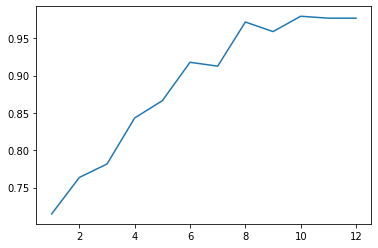

In [79]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)
scores = []
for i in range(1,13):
  tree = DecisionTreeClassifier(random_state = 1 , max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

plt.plot(range(1,13) ,scores)
plt.show()

In [80]:
tree = DecisionTreeClassifier(random_state = 1, max_depth=12)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=12, random_state=1)

In [81]:
test_point = ['vhigh', 'low', '3', '4', 'med', 'med']
test_point_int = [3, 0, 1, 1, 1, 1]
predictions = tree.predict(np.array(test_point_int).reshape(1, -1))
print(predictions)

[0]
